# Setup

## Import packages

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import and check data

In [81]:
maps_file = 'data/maps_data.xlsx'
pillar_file = 'data/pillar_marks_completed.csv'

maps_df = pd.read_excel(maps_file)
pillar_df = pd.read_csv(pillar_file)

In [82]:
maps_df.head()

,Unnamed: 0,map_name,matchup,patch,wins,losses,games,win_perc,loss_perc
0,12,Abyssal Reef LE,PvT,3.11,1070,1162,2232,0.4794,0.5206
1,19,Abyssal Reef LE,PvZ,3.11,1260,1340,2600,0.4846,0.5154
2,26,Abyssal Reef LE,TvZ,3.11,1656,1916,3572,0.4636,0.5364
3,87,Bel'Shir Vestige LE (Void),PvT,3.11,1276,1243,2519,0.5066,0.4934
4,90,Bel'Shir Vestige LE (Void),PvZ,3.11,1285,1407,2692,0.4773,0.5227


In [83]:
pillar_df.head()

,Map Name,Pillar,comment
0,16-Bit LE,Pillar can see natural entrance,In base natural
1,Abiogenesis LE,Pillar can see natural entrance,NaN
2,Abyssal Reef LE,No pillar,NaN
3,Acid Plant LE,Pillar can see natural entrance,NaN
4,Acolyte LE,Pillar can see natural entrance,In base natural


# Functions

In [84]:
def assign_pillar(map):
    pillar_mark = pillar_df[pillar_df['Map Name'] == map]['Pillar'].iloc[0]
    return pillar_mark

In [85]:
# split matchup

def split_matchup_first(matchup):
    race = matchup.split('v')[0]
    
    if race == 'T':
        return 'Terran'
    elif race == 'Z':
        return 'Zerg'
    else:
        return 'Protoss'

In [86]:
def split_matchup_second(matchup):
    race = matchup.split('v')[1]
    
    if race == 'T':
        return 'Terran'
    elif race == 'Z':
        return 'Zerg'
    else:
        return 'Protoss'

In [87]:
def calc_win_rate(df, wins_col, loss_col):
    df['win_perc'] = df[wins_col] / (df[wins_col] + df[loss_col])
    df['loss_perc'] = 1 - df['win_perc']

In [88]:
# assign new column of has pillar and otherwise
# ignore the pillar that can't see nat
# 1 for pillar exists, 0 otherwise

def check_pillar(pillar_mark):
    if pillar_mark == 'Pillar can see natural entrance':
        return 1
    else:
        return 0

# Light Data Cleaning

In [89]:
list(maps_df.columns)[0]

'Unnamed: 0'

In [90]:
# drop artifact column
maps_df.drop(columns = list(maps_df.columns)[0], inplace=True)

In [91]:
# append pillar
maps_df['pillar_label'] = maps_df['map_name'].apply(assign_pillar)
maps_df.head()

,map_name,matchup,patch,wins,losses,games,win_perc,loss_perc,pillar_label
0,Abyssal Reef LE,PvT,3.11,1070,1162,2232,0.4794,0.5206,No pillar
1,Abyssal Reef LE,PvZ,3.11,1260,1340,2600,0.4846,0.5154,No pillar
2,Abyssal Reef LE,TvZ,3.11,1656,1916,3572,0.4636,0.5364,No pillar
3,Bel'Shir Vestige LE (Void),PvT,3.11,1276,1243,2519,0.5066,0.4934,Pillar can see natural entrance
4,Bel'Shir Vestige LE (Void),PvZ,3.11,1285,1407,2692,0.4773,0.5227,Pillar can see natural entrance


In [92]:
# apply matchups

maps_df['race_a'] = maps_df.matchup.apply(split_matchup_first)
maps_df['race_b'] = maps_df.matchup.apply(split_matchup_second)

maps_df.head()

,map_name,matchup,patch,wins,losses,games,win_perc,loss_perc,pillar_label,race_a,race_b
0,Abyssal Reef LE,PvT,3.11,1070,1162,2232,0.4794,0.5206,No pillar,Protoss,Terran
1,Abyssal Reef LE,PvZ,3.11,1260,1340,2600,0.4846,0.5154,No pillar,Protoss,Zerg
2,Abyssal Reef LE,TvZ,3.11,1656,1916,3572,0.4636,0.5364,No pillar,Terran,Zerg
3,Bel'Shir Vestige LE (Void),PvT,3.11,1276,1243,2519,0.5066,0.4934,Pillar can see natural entrance,Protoss,Terran
4,Bel'Shir Vestige LE (Void),PvZ,3.11,1285,1407,2692,0.4773,0.5227,Pillar can see natural entrance,Protoss,Zerg


In [93]:
# bin pillar/ no pillars
maps_df['pillar'] = maps_df.pillar_label.apply(check_pillar)

In [94]:
maps_df.head()

,map_name,matchup,patch,wins,losses,games,win_perc,loss_perc,pillar_label,race_a,race_b,pillar
0,Abyssal Reef LE,PvT,3.11,1070,1162,2232,0.4794,0.5206,No pillar,Protoss,Terran,0
1,Abyssal Reef LE,PvZ,3.11,1260,1340,2600,0.4846,0.5154,No pillar,Protoss,Zerg,0
2,Abyssal Reef LE,TvZ,3.11,1656,1916,3572,0.4636,0.5364,No pillar,Terran,Zerg,0
3,Bel'Shir Vestige LE (Void),PvT,3.11,1276,1243,2519,0.5066,0.4934,Pillar can see natural entrance,Protoss,Terran,1
4,Bel'Shir Vestige LE (Void),PvZ,3.11,1285,1407,2692,0.4773,0.5227,Pillar can see natural entrance,Protoss,Zerg,1


# Exploratory Data Analysis

In [95]:
maps_df[['wins', 'losses', 'win_perc', 'loss_perc']].describe()

,wins,losses,win_perc,loss_perc
count,447.000000,447.000000,447.000000,447.000000
mean,5954.859060,5785.398210,0.506049,0.493951
std,5903.359792,5661.381863,0.059901,0.059901
min,0.000000,0.000000,0.000000,0.000000
25%,1719.500000,1796.500000,0.483800,0.475700
50%,3260.000000,3198.000000,0.502500,0.497500
75%,8947.500000,8447.500000,0.524300,0.516200
max,30248.000000,29041.000000,1.000000,1.000000


In [96]:
total_avg = maps_df.wins.sum() / (maps_df.wins.sum() + maps_df.losses.sum())
total_avg

0.5072170841832773

In [97]:
maps_df.sort_values(by='games', ascending=False)

,map_name,matchup,patch,wins,losses,games,win_perc,loss_perc,pillar_label,race_a,race_b,pillar
260,Ever Dream LE,TvZ,4.11.4,30248,28468,58716,0.5152,0.4848,Pillar can see natural entrance,Terran,Zerg,1
257,Eternal Empire LE,TvZ,4.11.4,29887,26822,56709,0.5270,0.4730,Pillar can see natural entrance,Terran,Zerg,1
259,Ever Dream LE,PvZ,4.11.4,26475,29041,55516,0.4769,0.5231,Pillar can see natural entrance,Protoss,Zerg,1
258,Ever Dream LE,PvT,4.11.4,29732,24746,54478,0.5458,0.4542,Pillar can see natural entrance,Protoss,Terran,1
255,Eternal Empire LE,PvT,4.11.4,29262,25099,54361,0.5383,0.4617,Pillar can see natural entrance,Protoss,Terran,1
...,...,...,...,...,...,...,...,...,...,...,...,...
199,Odyssey LE,PvZ,4.1.4,1,1,2,0.5000,0.5000,Pillar can see natural entrance,Protoss,Zerg,1
174,Abyssal Reef LE,PvT,4.1.4,1,1,2,0.5000,0.5000,No pillar,Protoss,Terran,0
198,Odyssey LE,PvT,4.1.4,1,0,1,1.0000,0.0000,Pillar can see natural entrance,Protoss,Terran,1
175,Abyssal Reef LE,PvZ,4.1.4,1,0,1,1.0000,0.0000,No pillar,Protoss,Zerg,0


In [98]:
maps_df.sort_values(by='games', ascending=True)[maps_df.wins <= 500]

<ipython-input-98-a62966dac721>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  maps_df.sort_values(by='games', ascending=True)[maps_df.wins <= 500]


,map_name,matchup,patch,wins,losses,games,win_perc,loss_perc,pillar_label,race_a,race_b,pillar
198,Odyssey LE,PvT,4.1.4,1,0,1,1.0000,0.0000,Pillar can see natural entrance,Protoss,Terran,1
175,Abyssal Reef LE,PvZ,4.1.4,1,0,1,1.0000,0.0000,No pillar,Protoss,Zerg,0
180,Ascension to Aiur LE,PvT,4.1.4,1,0,1,1.0000,0.0000,Pillar can see natural entrance,Protoss,Terran,1
174,Abyssal Reef LE,PvT,4.1.4,1,1,2,0.5000,0.5000,No pillar,Protoss,Terran,0
181,Ascension to Aiur LE,PvZ,4.1.4,1,1,2,0.5000,0.5000,Pillar can see natural entrance,Protoss,Zerg,1
199,Odyssey LE,PvZ,4.1.4,1,1,2,0.5000,0.5000,Pillar can see natural entrance,Protoss,Zerg,1
176,Abyssal Reef LE,TvZ,4.1.4,3,0,3,1.0000,0.0000,No pillar,Terran,Zerg,0
200,Odyssey LE,TvZ,4.1.4,1,2,3,0.3333,0.6667,Pillar can see natural entrance,Terran,Zerg,1
182,Ascension to Aiur LE,TvZ,4.1.4,0,4,4,0.0000,1.0000,Pillar can see natural entrance,Terran,Zerg,1
238,Turbo Cruise '84 LE,PvZ,4.10.1,190,210,400,0.4750,0.5250,Pillar can see natural entrance,Protoss,Zerg,1


In [99]:
# number of maps/matchups with less than 50 games played
len(maps_df.sort_values(by='games', ascending=True)[maps_df.games <= 500])

<ipython-input-99-cbc5465a9087>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(maps_df.sort_values(by='games', ascending=True)[maps_df.games <= 500])


11

In [100]:
# exclude rows with very few numbers of games

maps_df = maps_df[maps_df.wins >= 500]

In [101]:
# number of unique maps
len(maps_df.map_name.unique())

70

In [102]:
maps_df.groupby('map_name')[['wins', 'losses', 'games']].sum().describe()

,wins,losses,games
count,70.000000,70.000000,70.000000
mean,37965.957143,36884.657143,74850.614286
std,29823.987213,28400.677149,58205.175882
min,1967.000000,2063.000000,4030.000000
25%,11210.750000,11343.000000,22556.750000
50%,26550.000000,26162.500000,52583.500000
75%,57714.500000,56290.750000,114364.000000
max,136025.000000,126537.000000,262562.000000


In [103]:
unique_maps = maps_df.groupby(['map_name', 'pillar_label'])[['wins', 'losses']].sum().reset_index()
unique_maps['games'] = unique_maps.wins + unique_maps.losses
unique_maps

,map_name,pillar_label,wins,losses,games
0,16-Bit LE,Pillar can see natural entrance,25333,23255,48588
1,Abiogenesis LE,Pillar can see natural entrance,25911,27497,53408
2,Abyssal Reef LE,No pillar,65778,67311,133089
3,Acid Plant LE,Pillar can see natural entrance,88823,86559,175382
4,Acolyte LE,Pillar can see natural entrance,16093,14478,30571
...,...,...,...,...,...
65,Whirlwind LE (Void),Pillar can see natural entrance,1967,2063,4030
66,Winter's Gate LE,Pillar can see natural entrance,21275,20994,42269
67,World of Sleepers LE,Pillar can see natural entrance,57742,56984,114726
68,Year Zero LE,Pillar can see natural entrance,25510,24079,49589


In [104]:
# see how many maps have each pillar mark
unique_maps.pillar_label.value_counts()

Pillar can see natural entrance       51
No pillar                             13
Pillar cannot see natural entrance     6
Name: pillar_label, dtype: int64

In [105]:
# append win perc to unique maps
unique_maps['win_perc'] = unique_maps.wins / (unique_maps.wins + unique_maps.losses)

In [106]:
# top 15 played maps in dataset
unique_maps.sort_values(by='games', ascending=False).head(n=15)

,map_name,pillar_label,wins,losses,games,win_perc
28,Eternal Empire LE,Pillar can see natural entrance,136025,126537,262562,0.518068
29,Ever Dream LE,Pillar can see natural entrance,113065,106895,219960,0.514025
16,Catalyst LE,Pillar can see natural entrance,91444,88249,179693,0.508890
37,Kairos Junction LE,Pillar can see natural entrance,91646,87625,179271,0.511215
58,Simulacrum LE,Pillar can see natural entrance,89119,86836,175955,0.506487
3,Acid Plant LE,Pillar can see natural entrance,88823,86559,175382,0.506454
45,Nightshade LE,Pillar can see natural entrance,83834,78424,162258,0.516671
27,Ephemeron LE,Pillar can see natural entrance,70943,67143,138086,0.513760
2,Abyssal Reef LE,No pillar,65778,67311,133089,0.494241
62,Triton LE,Pillar can see natural entrance,67354,63880,131234,0.513236


In [107]:
# top 15 maps pillar value counts
unique_maps.sort_values(by='games', ascending=False).head(n=15).pillar_label.value_counts()

Pillar can see natural entrance       13
Pillar cannot see natural entrance     1
No pillar                              1
Name: pillar_label, dtype: int64

In [108]:
unique_maps.describe()

,wins,losses,games,win_perc
count,70.000000,70.000000,70.000000,70.000000
mean,37965.957143,36884.657143,74850.614286,0.503572
std,29823.987213,28400.677149,58205.175882,0.013497
min,1967.000000,2063.000000,4030.000000,0.464358
25%,11210.750000,11343.000000,22556.750000,0.496256
50%,26550.000000,26162.500000,52583.500000,0.504700
75%,57714.500000,56290.750000,114364.000000,0.512685
max,136025.000000,126537.000000,262562.000000,0.528747


In [109]:
unique_maps.games.sum()

5239543

<AxesSubplot:>

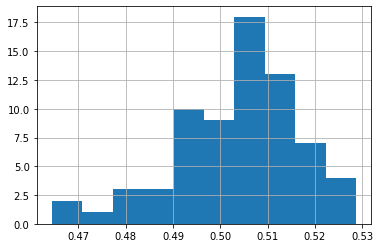

In [110]:
unique_maps.win_perc.hist()

In [111]:
# win rate by patch
patch_df = maps_df.groupby(['patch', 'matchup'])[[
    'map_name', 'matchup', 'patch', 'wins', 'losses', 'pillar_label'
    ]]\
    .sum()\
    .reset_index()

# calculate new win rates
patch_df['win_rate'] = round(
                            (patch_df['wins'] / (patch_df['wins'] + patch_df['losses'])),
                            3
                            )

patch_df.head()

,patch,matchup,wins,losses,win_rate
0,3.11,PvT,7242,7211,0.501
1,3.11,PvZ,7473,8023,0.482
2,3.11,TvZ,10701,11457,0.483
3,3.12,PvT,17332,17108,0.503
4,3.12,PvZ,16815,17684,0.487


In [112]:
# check min/max values by patches
patch_df.describe()

,wins,losses,win_rate
count,39.000000,39.000000,39.000000
mean,68144.025641,66203.230769,0.502641
std,61304.251220,58735.374464,0.023201
min,7242.000000,7211.000000,0.457000
25%,18526.000000,19344.000000,0.487000
50%,36793.000000,39198.000000,0.501000
75%,118818.500000,116040.000000,0.516500
max,198031.000000,196358.000000,0.555000


In [113]:
patch_df.sort_values(by='win_rate').head()

,patch,matchup,wins,losses,win_rate
13,4.0,PvZ,13336,15858,0.457
16,4.1.1,PvZ,27739,31830,0.466
19,4.1.4,PvZ,16871,19130,0.469
25,4.11.4,PvZ,156008,170730,0.477
22,4.10.1,PvZ,115612,125234,0.480


In [114]:
patch_df.sort_values(by='win_rate', ascending=False).head()

,patch,matchup,wins,losses,win_rate
12,4.0,PvT,15942,12770,0.555
15,4.1.1,PvT,31744,26720,0.543
24,4.11.4,PvT,178392,152576,0.539
36,5.0.2,PvT,71351,61387,0.538
33,4.8.3,PvT,122025,105392,0.537


In [115]:
# assign the same for loss perc to see zerg centric stats
patch_df['loss_rate'] = 1 - patch_df.win_rate
patch_df.head()

,patch,matchup,wins,losses,win_rate,loss_rate
0,3.11,PvT,7242,7211,0.501,0.499
1,3.11,PvZ,7473,8023,0.482,0.518
2,3.11,TvZ,10701,11457,0.483,0.517
3,3.12,PvT,17332,17108,0.503,0.497
4,3.12,PvZ,16815,17684,0.487,0.513


In [116]:
patch_df.sort_values(by='loss_rate').head()

,patch,matchup,wins,losses,win_rate,loss_rate
12,4.0,PvT,15942,12770,0.555,0.445
15,4.1.1,PvT,31744,26720,0.543,0.457
24,4.11.4,PvT,178392,152576,0.539,0.461
36,5.0.2,PvT,71351,61387,0.538,0.462
33,4.8.3,PvT,122025,105392,0.537,0.463


In [117]:
patch_df.sort_values(by='loss_rate', ascending=False).head()

,patch,matchup,wins,losses,win_rate,loss_rate
13,4.0,PvZ,13336,15858,0.457,0.543
16,4.1.1,PvZ,27739,31830,0.466,0.534
19,4.1.4,PvZ,16871,19130,0.469,0.531
25,4.11.4,PvZ,156008,170730,0.477,0.523
22,4.10.1,PvZ,115612,125234,0.480,0.520


In [118]:
patch_df2 = maps_df.groupby(['patch'])[[
    'map_name', 'matchup', 'patch', 'wins', 'losses', 'pillar_label'
    ]]\
    .sum()\
    .reset_index()

In [119]:
patch_df2['games'] = patch_df2.wins + patch_df2.losses
patch_df2['win_perc'] = patch_df2.wins / patch_df2.games

In [120]:
patch_df2.describe()

,wins,losses,games,win_perc
count,13.000000,13.000000,1.300000e+01,13.000000
mean,204432.076923,198609.692308,4.030418e+05,0.502326
std,187984.751672,180003.907515,3.679735e+05,0.008265
min,25416.000000,26691.000000,5.210700e+04,0.487766
25%,57240.000000,59072.000000,1.163120e+05,0.497955
50%,116013.000000,115287.000000,2.313000e+05,0.501569
75%,357545.000000,342736.000000,7.002810e+05,0.510254
max,561567.000000,546019.000000,1.107586e+06,0.514619


In [121]:
patch_df2

,patch,wins,losses,games,win_perc
0,3.11,25416,26691,52107,0.487766
1,3.12,57240,59072,116312,0.492125
2,3.14,169624,171017,340641,0.497955
3,3.8,68906,70876,139782,0.492953
4,4.0,43621,43425,87046,0.501126
5,4.1.1,91121,89839,180960,0.503542
6,4.1.4,54345,54471,108816,0.499421
7,4.10.1,391410,374095,765505,0.511310
8,4.11.4,513897,493242,1007139,0.510254
9,4.2.1,116013,115287,231300,0.501569


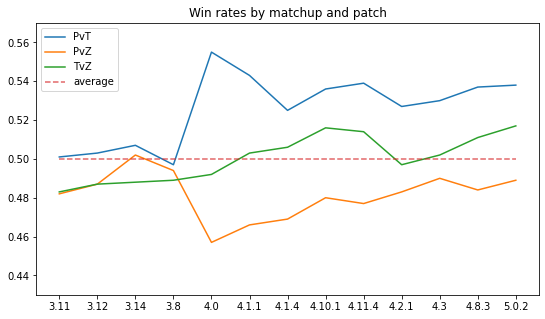

In [122]:
# plot win rates by patch

matchups = list(patch_df.matchup.unique())
x = list(patch_df.patch.astype(str).unique())

ref_line = [0.5 for x in range(len(patch_df.patch.unique()))]

plt.figure(figsize=(9,5))

pvt_win_rate = patch_df[patch_df.matchup == 'PvT'].win_rate
#pvt_win_rate = list(pvt_df.win_rate)

for matchup in matchups:
    win_rates = patch_df[patch_df.matchup == matchup].win_rate
    plt.plot(x, win_rates, label=matchup)
    
plt.plot(x, ref_line, label = 'average', ls='dashed', alpha=0.7)
plt.ylim(0.43, 0.57)    

plt.title('Win rates by matchup and patch')
plt.legend()

<Figure size 432x288 with 0 Axes>

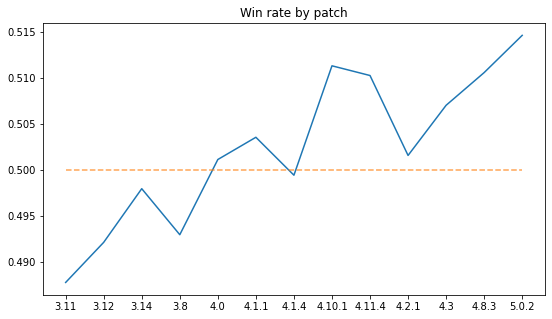

In [123]:
# chart of global win rates over time
plt.clf()

plt.figure(figsize = (9,5))

ref_line = [0.5 for x in range(len(patch_df2.patch.unique()))]

plt.plot(patch_df2.patch, patch_df2.win_perc)
plt.plot(x, ref_line, label = 'average', ls='dashed', alpha=0.7)
plt.title('Win rate by patch')
plt.show()

<Figure size 432x288 with 0 Axes>

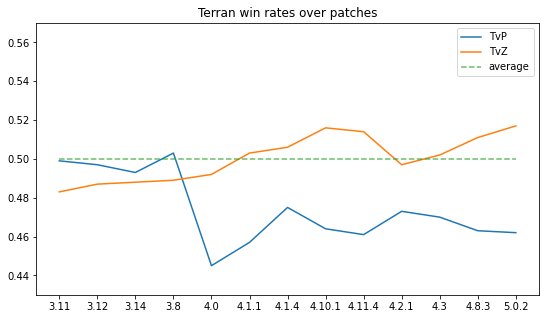

In [124]:
# plot win rates per patch for each matchup
# tvz, tvp

plt.clf() # clear figure

plt.figure(figsize=(9,5))

tvp = patch_df[patch_df.matchup == 'PvT'].loss_rate
tvz = patch_df[patch_df.matchup == 'TvZ'].win_rate

ref_line = [0.5 for x in range(len(patch_df.patch.unique()))]

plt.plot(x, tvp, label= 'TvP')
plt.plot(x, tvz, label = 'TvZ')
plt.plot(x, ref_line, label = 'average', ls='dashed', alpha=0.7)

plt.ylim(0.43, 0.57) 

plt.title('Terran win rates over patches')
plt.legend()

plt.savefig('plot_figures/tvx_win_rates.png')
plt.show()


<Figure size 432x288 with 0 Axes>

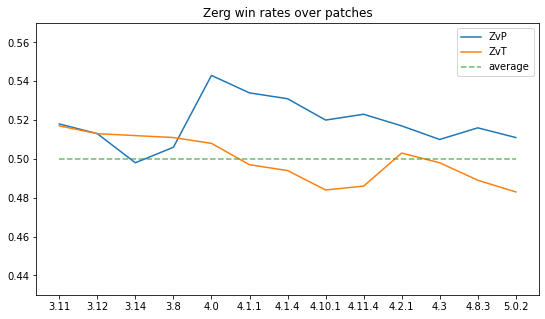

In [125]:
# zvp, zvt

plt.clf() # clear figure

plt.figure(figsize=(9,5))

zvp = patch_df[patch_df.matchup == 'PvZ'].loss_rate
zvt = patch_df[patch_df.matchup == 'TvZ'].loss_rate

ref_line = [0.5 for x in range(len(patch_df.patch.unique()))]

plt.plot(x, zvp, label= 'ZvP')
plt.plot(x, zvt, label = 'ZvT')
plt.plot(x, ref_line, label = 'average', ls='dashed', alpha=0.7)

plt.ylim(0.43, 0.57) 

plt.title('Zerg win rates over patches')
plt.legend()

plt.savefig('plot_figures/zvx_win_rates.png')
plt.show()

<Figure size 432x288 with 0 Axes>

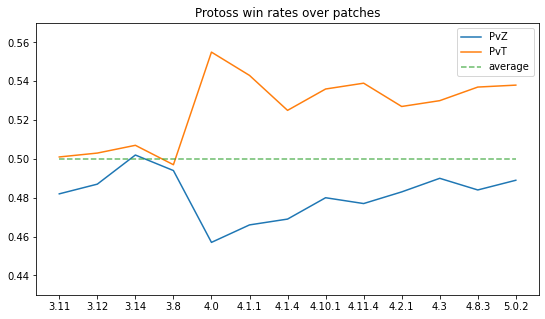

In [126]:
# pvt, pvz

plt.clf() # clear figure

plt.figure(figsize=(9,5))

pvz = patch_df[patch_df.matchup == 'PvZ'].win_rate
pvt = patch_df[patch_df.matchup == 'PvT'].win_rate

ref_line = [0.5 for x in range(len(patch_df.patch.unique()))]

plt.plot(x, pvz, label= 'PvZ')
plt.plot(x, pvt, label = 'PvT')
plt.plot(x, ref_line, label = 'average', ls='dashed', alpha=0.7)

plt.ylim(0.43, 0.57) 

plt.title('Protoss win rates over patches')
plt.legend()

plt.savefig('plot_figures/pvx_win_rates.png')
plt.show()

In [152]:
# parse win rates by patch and matchup

patch_p_df = patch_df[patch_df.matchup.str.contains("P")]
patch_z_df = patch_df[patch_df.matchup.str.contains("Z")]
patch_t_df = patch_df[patch_df.matchup.str.contains("T")]

patch_p_df['games'] = patch_p_df.wins + patch_p_df.losses
patch_z_df['games'] = patch_z_df.wins + patch_z_df.losses
patch_t_df['games'] = patch_t_df.wins + patch_t_df.losses

<ipython-input-152-9919259ca276>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patch_p_df['games'] = patch_p_df.wins + patch_p_df.losses
<ipython-input-152-9919259ca276>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patch_z_df['games'] = patch_z_df.wins + patch_z_df.losses
<ipython-input-152-9919259ca276>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [167]:
# parse terran df
#patch_t_df

patch_t_df['t_win_rate'] = patch_t_df['matchup'].apply(
    lambda mu: patch_t_df.win_rate if (mu.str.startswith('T')) else patch_t_df.loss_rate
)

AttributeError: 'str' object has no attribute 'str'

In [172]:
terran_centric_rate = list()

for i in range(len(patch_t_df)):
    if patch_t_df.iloc[i].matchup.startswith('T'):
        terran_centric_rate.append(patch_t_df.iloc[i].win_rate)
    else:
        terran_centric_rate.append(patch_t_df.iloc[i].loss_rate)

patch_t_df['t_win_rate'] = terran_centric_rate

<ipython-input-172-a4784709de45>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patch_t_df['t_win_rate'] = terran_centric_rate


In [173]:
patch_t_df

,patch,matchup,wins,losses,win_rate,loss_rate,games,t_win_rate
0,3.11,PvT,7242,7211,0.501,0.499,14453,0.499
2,3.11,TvZ,10701,11457,0.483,0.517,22158,0.483
3,3.12,PvT,17332,17108,0.503,0.497,34440,0.497
5,3.12,TvZ,23093,24280,0.487,0.513,47373,0.487
6,3.14,PvT,50321,48892,0.507,0.493,99213,0.493
8,3.14,TvZ,67832,71081,0.488,0.512,138913,0.488
9,3.8,PvT,20064,20330,0.497,0.503,40394,0.503
11,3.8,TvZ,29265,30531,0.489,0.511,59796,0.489
12,4.0,PvT,15942,12770,0.555,0.445,28712,0.445
14,4.0,TvZ,14343,14797,0.492,0.508,29140,0.492


In [174]:
# output to tables
patch_p_df.to_csv('output_tables/patch_p.csv')
patch_z_df.to_csv('output_tables/patch_z.csv')
patch_t_df.to_csv('output_tables/patch_t.csv')

In [154]:
patch_p_df.wins.sum() / patch_p_df.games.sum()

0.5077759311854039

In [156]:
patch_z_df.losses.sum() / patch_z_df.games.sum()

0.5043871757967479

In [157]:
patch_t_df

,patch,matchup,wins,losses,win_rate,loss_rate,games
0,3.11,PvT,7242,7211,0.501,0.499,14453
2,3.11,TvZ,10701,11457,0.483,0.517,22158
3,3.12,PvT,17332,17108,0.503,0.497,34440
5,3.12,TvZ,23093,24280,0.487,0.513,47373
6,3.14,PvT,50321,48892,0.507,0.493,99213
8,3.14,TvZ,67832,71081,0.488,0.512,138913
9,3.8,PvT,20064,20330,0.497,0.503,40394
11,3.8,TvZ,29265,30531,0.489,0.511,59796
12,4.0,PvT,15942,12770,0.555,0.445,28712
14,4.0,TvZ,14343,14797,0.492,0.508,29140


In [160]:
games_sum = 0
wins_sum = 0
for i in range(len(patch_t_df)):
    games_sum += patch_t_df.iloc[i].games
    if patch_t_df.matchup.iloc[0] == 'PvT':
        wins_sum += patch_t_df.iloc[i].losses
        
    else:
        wins_sum += patch_t_df.iloc[i].wins

In [163]:
# terran win rate
float(wins_sum) / games_sum

0.48166293298700363

In [159]:
for row in patch_t_df:
    print(row)

patch
matchup
wins
losses
win_rate
loss_rate
games


In [128]:
# game wide win rates
matchups_df = maps_df.groupby('matchup').sum()[['wins', 'losses']].reset_index()
matchups_df['games'] = matchups_df.wins + matchups_df.losses
calc_win_rate(matchups_df, 'wins', 'losses')
matchups_df

,matchup,wins,losses,games,win_perc,loss_perc
0,PvT,889377,782381,1671758,0.532001,0.467999
1,PvZ,812138,867021,1679159,0.483658,0.516342
2,TvZ,956102,932524,1888626,0.506242,0.493758


In [145]:
# win rate of pillar vs no pillar

pillar_df = maps_df.groupby(by='pillar').sum()[['wins', 'losses']].reset_index()
calc_win_rate(pillar_df, 'wins', 'losses')
pillar_df.to_csv('output_tables/pillar_win_rates.csv')
pillar_df

In [130]:
df2 = maps_df.groupby(by=['matchup', 'pillar']).sum()[['wins', 'losses']].reset_index()
df2['games'] = df2['wins'] + df2['losses']
calc_win_rate(df2, 'wins', 'losses')
df2

,matchup,pillar,wins,losses,games,win_perc,loss_perc
0,PvT,0,159238,142263,301501,0.528151,0.471849
1,PvT,1,730139,640118,1370257,0.532848,0.467152
2,PvZ,0,148197,154297,302494,0.489917,0.510083
3,PvZ,1,663941,712724,1376665,0.482282,0.517718
4,TvZ,0,177137,173679,350816,0.504929,0.495071
5,TvZ,1,778965,758845,1537810,0.506542,0.493458


In [146]:
df2.to_csv('output_tables/pillar_by_matchup_rates.csv')

In [131]:
from scipy.stats import binom_test
def binom_test_col(df):
    data = list()
    for i in range(len(df)):
        x = df.iloc[i].win_perc
        n = df.iloc[i].games
        
        p = binom_test(x=x, n=n, p=0.5, alternative='greater')
        data.append(p)
        
    df['binom_test'] = data

In [132]:
binom_test_col(df2)

In [133]:
df2

,matchup,pillar,wins,losses,games,win_perc,loss_perc,binom_test
0,PvT,0,159238,142263,301501,0.528151,0.471849,1.0
1,PvT,1,730139,640118,1370257,0.532848,0.467152,1.0
2,PvZ,0,148197,154297,302494,0.489917,0.510083,1.0
3,PvZ,1,663941,712724,1376665,0.482282,0.517718,1.0
4,TvZ,0,177137,173679,350816,0.504929,0.495071,1.0
5,TvZ,1,778965,758845,1537810,0.506542,0.493458,1.0


In [134]:
# win rate of pillar differentiation

pillar_labels_df = maps_df.groupby(by='pillar_label').sum()[['wins', 'losses']].reset_index()
calc_win_rate(pillar_labels_df, 'wins', 'losses')
pillar_labels_df

,pillar_label,wins,losses,win_perc,loss_perc
0,No pillar,303396,300191,0.502655,0.497345
1,Pillar can see natural entrance,2173045,2111687,0.507160,0.492840
2,Pillar cannot see natural entrance,181176,170048,0.515842,0.484158


In [135]:
# win rates by matchup and map
df3 = maps_df.groupby(['map_name', 'matchup']).sum()[['wins', 'losses']].reset_index()
df3['games'] = df3.wins + df3.losses
calc_win_rate(df3, 'wins', 'losses')
df3

,map_name,matchup,wins,losses,games,win_perc,loss_perc
0,16-Bit LE,PvT,8371,8174,16545,0.505953,0.494047
1,16-Bit LE,PvZ,7538,7069,14607,0.516054,0.483946
2,16-Bit LE,TvZ,9424,8012,17436,0.540491,0.459509
3,Abiogenesis LE,PvT,8175,7829,16004,0.510810,0.489190
4,Abiogenesis LE,PvZ,7591,9256,16847,0.450585,0.549415
...,...,...,...,...,...,...,...
205,Year Zero LE,PvZ,8286,8660,16946,0.488965,0.511035
206,Year Zero LE,TvZ,8468,8213,16681,0.507643,0.492357
207,Zen LE,PvT,17802,15063,32865,0.541670,0.458330
208,Zen LE,PvZ,13965,17541,31506,0.443249,0.556751


In [136]:
binom_test_col(df3)
df3

,map_name,matchup,wins,losses,games,win_perc,loss_perc,binom_test
0,16-Bit LE,PvT,8371,8174,16545,0.505953,0.494047,1.0
1,16-Bit LE,PvZ,7538,7069,14607,0.516054,0.483946,1.0
2,16-Bit LE,TvZ,9424,8012,17436,0.540491,0.459509,1.0
3,Abiogenesis LE,PvT,8175,7829,16004,0.510810,0.489190,1.0
4,Abiogenesis LE,PvZ,7591,9256,16847,0.450585,0.549415,1.0
...,...,...,...,...,...,...,...,...
205,Year Zero LE,PvZ,8286,8660,16946,0.488965,0.511035,1.0
206,Year Zero LE,TvZ,8468,8213,16681,0.507643,0.492357,1.0
207,Zen LE,PvT,17802,15063,32865,0.541670,0.458330,1.0
208,Zen LE,PvZ,13965,17541,31506,0.443249,0.556751,1.0


In [137]:
binom_test(0.505953, n=16545, p = 0.5)

5e-324

In [138]:
binom_test(0.505953, n=16545, p = 0.5, alternative='less')

0.0

In [139]:
df3.win_perc.describe()

count    210.000000
mean       0.503707
std        0.025959
min        0.418919
25%        0.484806
50%        0.504066
75%        0.524738
max        0.565233
Name: win_perc, dtype: float64

<AxesSubplot:>

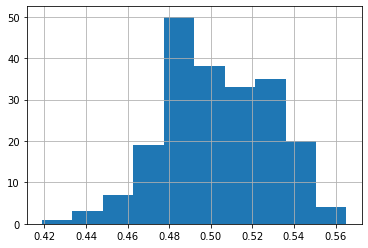

In [140]:
df3.win_perc.hist()

array([[<AxesSubplot:title={'center':'PvT'}>,
        <AxesSubplot:title={'center':'PvZ'}>],
       [<AxesSubplot:title={'center':'TvZ'}>, <AxesSubplot:>]],
      dtype=object)

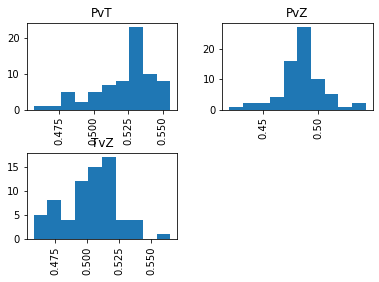

In [141]:
df3['win_perc'].hist(by=df3['matchup'])

In [142]:
df4 = maps_df[maps_df.wins >= 1000]
df4.describe()

,wins,losses,games,win_perc,loss_perc,pillar
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,6621.309045,6428.253769,13049.562814,0.504061,0.495939,0.736181
std,5922.393867,5675.474278,11567.369386,0.027200,0.027200,0.441257
min,1001.000000,928.000000,1978.000000,0.409000,0.426900,0.000000
25%,2170.750000,2166.500000,4414.750000,0.485425,0.475650,0.000000
50%,4380.500000,4236.000000,8659.000000,0.503300,0.496700,1.000000
75%,9422.500000,8723.250000,18434.500000,0.524350,0.514575,1.000000
max,30248.000000,29041.000000,58716.000000,0.573100,0.591000,1.000000


<AxesSubplot:>

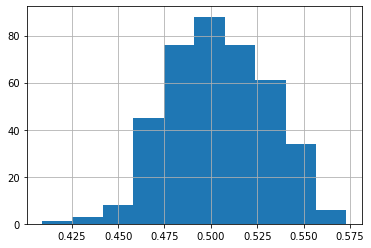

In [143]:
df4.win_perc.hist()

In [148]:
maps_df

,map_name,matchup,patch,wins,losses,games,win_perc,loss_perc,pillar_label,race_a,race_b,pillar
0,Abyssal Reef LE,PvT,3.11,1070,1162,2232,0.4794,0.5206,No pillar,Protoss,Terran,0
1,Abyssal Reef LE,PvZ,3.11,1260,1340,2600,0.4846,0.5154,No pillar,Protoss,Zerg,0
2,Abyssal Reef LE,TvZ,3.11,1656,1916,3572,0.4636,0.5364,No pillar,Terran,Zerg,0
3,Bel'Shir Vestige LE (Void),PvT,3.11,1276,1243,2519,0.5066,0.4934,Pillar can see natural entrance,Protoss,Terran,1
4,Bel'Shir Vestige LE (Void),PvZ,3.11,1285,1407,2692,0.4773,0.5227,Pillar can see natural entrance,Protoss,Zerg,1
...,...,...,...,...,...,...,...,...,...,...,...,...
442,Romanticide LE,PvZ,5.0.2,2726,2629,5355,0.5091,0.4909,Pillar can see natural entrance,Protoss,Zerg,1
443,Romanticide LE,TvZ,5.0.2,2996,2761,5757,0.5204,0.4796,Pillar can see natural entrance,Terran,Zerg,1
444,Submarine LE,PvT,5.0.2,9602,8738,18340,0.5236,0.4764,Pillar can see natural entrance,Protoss,Terran,1
445,Submarine LE,PvZ,5.0.2,8257,9197,17454,0.4731,0.5269,Pillar can see natural entrance,Protoss,Zerg,1
